<a href="https://colab.research.google.com/github/Ireonx/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



train_data = pd.read_csv('https://raw.githubusercontent.com/Ireonx/titanic/main/train.csv', error_bad_lines=False)
titanic = train_data.copy()
test_data = pd.read_csv('https://raw.githubusercontent.com/Ireonx/titanic/main/test.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

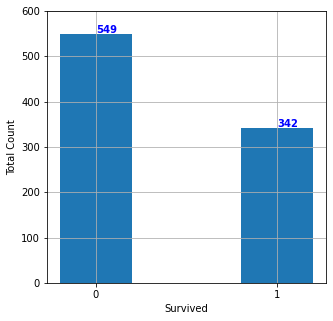

In [44]:
# Visualize counts
fig,ax =plt.subplots(figsize=(5,5))
ax.bar(x=[0,1],height=list(titanic['Survived'].value_counts()),width=0.4)
for i,v in enumerate(list(titanic['Survived'].value_counts())):
    ax.text(i,v+10,str(v),color='blue', va='center', fontweight='bold')
plt.xlabel('Survived')
plt.ylabel('Total Count')
plt.xticks([0,1])
plt.ylim(0,600)
plt.grid()
plt.show()

In [45]:
vals = {}
for i in titanic['Pclass'].unique().tolist():
    vals[i]=titanic[titanic['Pclass']==i]['Pclass'].count()

vals

{1: 216, 2: 184, 3: 491}

(0.0, 600.0)

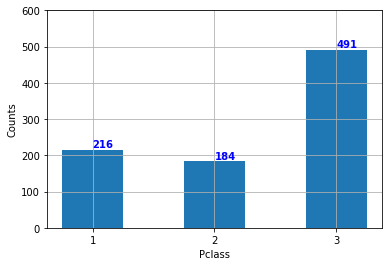

In [46]:
# Visualize the counts
fig,ax = plt.subplots()
ax.bar(x=list(vals.keys()), height=list(vals.values()), width=0.5)
for i in vals.keys():
    ax.text(i,vals[i]+15, str(vals[i]),color='blue',va='center',fontweight='bold')
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.xticks([1,2,3])
plt.grid()
plt.ylim(0,600)

In [47]:
# Lets create a function for checking value counts of next categories 
def viz_value_counts(datadf,field):
    vals = {}
    for i in titanic[field].unique().tolist():
        vals[i]=titanic[titanic[field]==i][field].count()
    fig,ax = plt.subplots()
    ax.bar(x=list(vals.keys()), height=list(vals.values()), width=0.5)
    for i in vals.keys():
        ax.text(i,vals[i]+15, str(vals[i]),color='blue',va='center',fontweight='bold')
    plt.xlabel(field)
    plt.ylabel('Counts')
    plt.xticks(list(vals.keys()))
    plt.grid()
    plt.ylim(0,max(vals.values())+100)

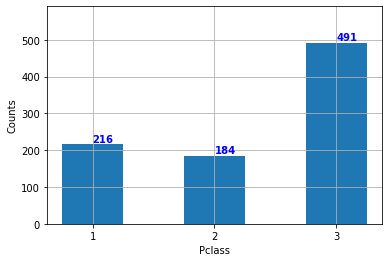

In [48]:
# Test the function 
viz_value_counts(titanic,'Pclass')

In [49]:
# Now creating a Category plot with multiple categories 
# Example : How many person from each categories belong to each Survived class
def viz_catplots(datadf,field1,field2):
    plt.figure(figsize=(10,6))
    g=sns.catplot(x=field2,col=field1, data=datadf[[field1,field2]], kind="count", height=2.5, aspect=.8)
    g.set_axis_labels('Survived','Counts')
    g.fig.set_size_inches(10, 6)
    g.fig.subplots_adjust(top=0.81, right=0.86)
    print(titanic[['PassengerId',field1,field2]].groupby([field1,field2]).PassengerId.nunique())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


<Figure size 720x432 with 0 Axes>

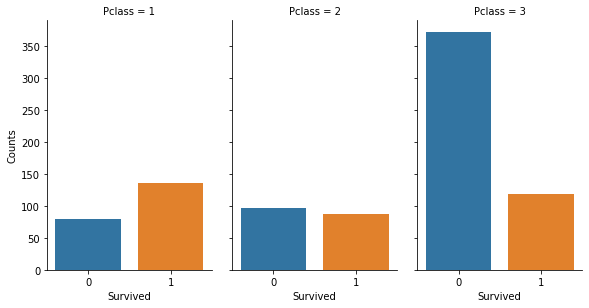

In [50]:
viz_catplots(titanic,'Pclass','Survived')

gender  Survived
0       0            81
        1           233
1       0           468
        1           109
Name: PassengerId, dtype: int64


<Figure size 720x432 with 0 Axes>

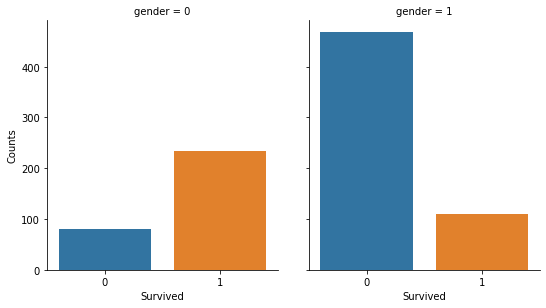

In [51]:
# Visualize gender wise counts of death
titanic['gender'] = titanic['Sex'].map({'male':1,'female':0})
viz_catplots(titanic,'gender','Survived')

               PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347


<Figure size 1440x720 with 0 Axes>

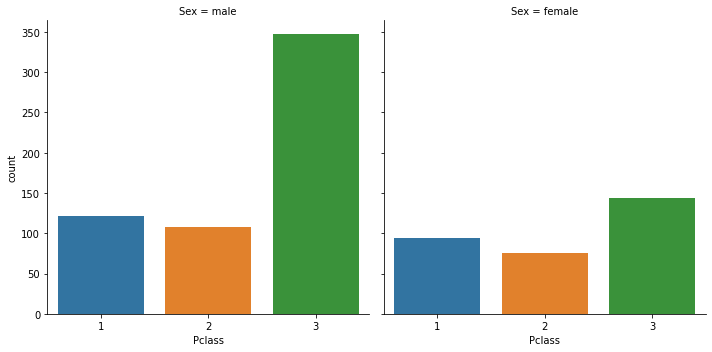

In [52]:
# Now How many men and Female belong to each Passenger class
plt.figure(figsize=(20,10))
g=sns.catplot(data=titanic,x='Pclass',col='Sex',kind='count')
print(titanic[['Pclass','Sex','PassengerId']].groupby(['Pclass','Sex']).count())
# iterate thru' axes
#for ax in g.axes.ravel():
#    for c in ax.containers:
#        labels = [v.get_height() for v in c]
#        ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

    Pclass     Sex  Survived  PassengerId
0        1  female         0            3
1        1  female         1           91
2        1    male         0           77
3        1    male         1           45
4        2  female         0            6
5        2  female         1           70
6        2    male         0           91
7        2    male         1           17
8        3  female         0           72
9        3  female         1           72
10       3    male         0          300
11       3    male         1           47


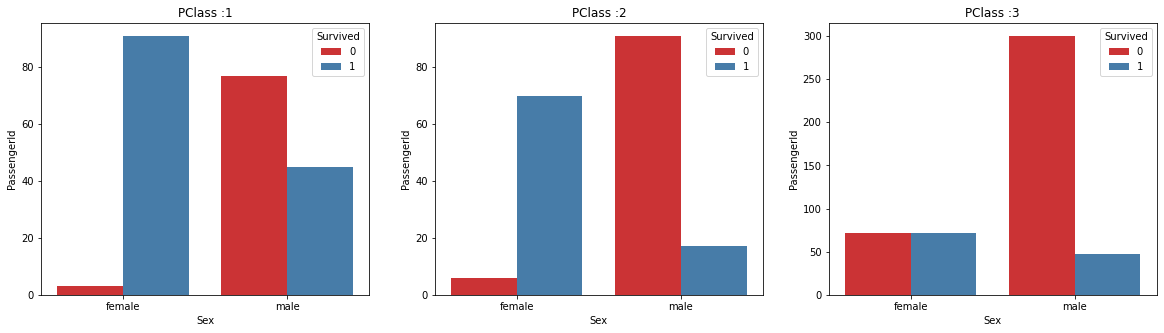

In [53]:
# Checking how many persons killed per class per gender
catSurvive = titanic[['Pclass','Sex','PassengerId','Survived']].groupby(['Pclass','Sex','Survived']).count()
catSurvive=catSurvive.reset_index()
print(catSurvive)

plt.figure(figsize=(20,5))
for i in catSurvive['Pclass'].unique().tolist() :
    plt.subplot(1,3,i)
    sns.barplot(data=catSurvive[catSurvive['Pclass']==i],x='Sex',y='PassengerId',hue='Survived',palette="Set1")
    plt.title('PClass :'+str(i))
plt.show()

In [54]:
# how many rows in Age are having null
titanic['Age'].isnull().sum()

177

In [55]:
# In those 177 rows How many survived ( where age is null)
titanic[titanic['Age'].isnull()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [56]:
# First of all lets select the rows having Age as not null
titanic_age_notnull = titanic[~titanic['Age'].isnull()]
titanic_age_notnull.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


Text(0.5, 1.0, 'Range of survival in each age')

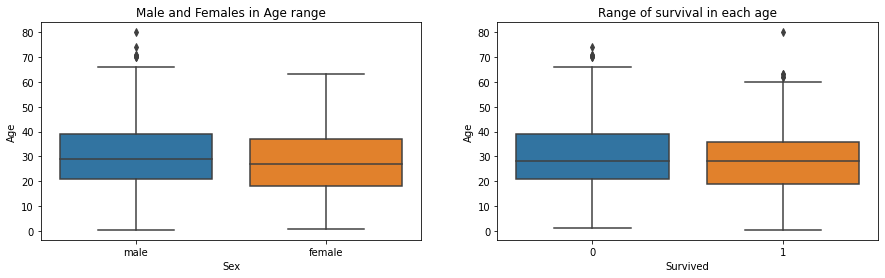

In [57]:
# Let us Analyze Age w.r.t  variables : sex
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(data=titanic, x="Sex",y="Age")
plt.title("Male and Females in Age range")
plt.subplot(122)
sns.boxplot(data=titanic,x='Survived',y='Age')
plt.title("Range of survival in each age")

Text(0.5, 1.0, ' Gender Female - Age wise survival')

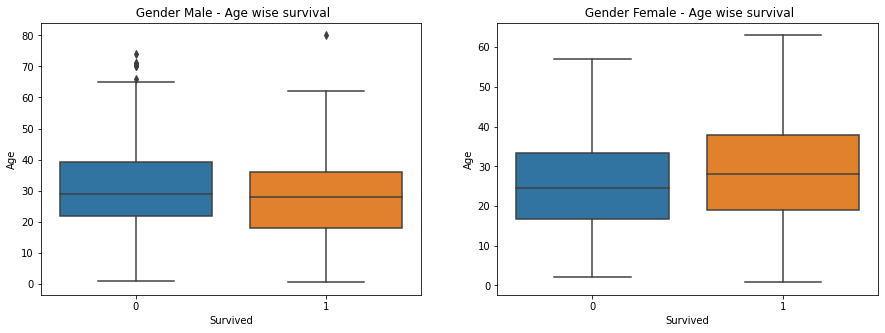

In [58]:
# lets check Gender wise survival status with respect to age
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=titanic[titanic['Sex']=='male'],x='Survived',y='Age')
plt.title(" Gender Male - Age wise survival")

plt.subplot(122)
sns.boxplot(data=titanic[titanic['Sex']=='female'],x='Survived',y='Age')
plt.title(" Gender Female - Age wise survival")

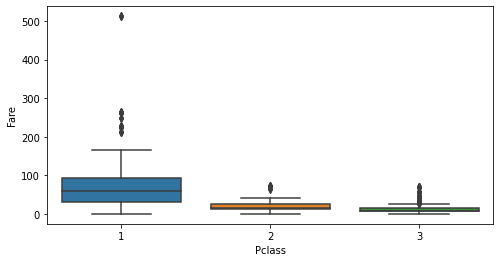

In [59]:
plt.figure(figsize=(8,4))
sns.boxplot(data=titanic,x="Pclass",y="Fare")
plt.show()

In [60]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [61]:
# What are the distinct values
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [62]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [63]:
# how many null values?
titanic.Cabin.isnull().sum()

687

In [64]:
# Lets extract first character of Cabin, Hope it holds some information
titanic_wthCabin = titanic[~titanic['Cabin'].isnull()]
titanic_wthCabin['Cabin_Class'] = titanic_wthCabin['Cabin'].map(lambda x: str(x)[0])
titanic = pd.merge(titanic,titanic_wthCabin,left_on='PassengerId',right_on='PassengerId',suffixes=('','_C'),how='left')

titanic.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_C,Age_C,SibSp_C,Parch_C,Ticket_C,Fare_C,Cabin_C,Embarked_C,gender_C,Cabin_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,female,35.0,1.0,0.0,113803,53.1000,C123,S,0.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cols_to_drop = [i for i in titanic.columns if i[-2:]=='_C' ]
titanic = titanic.drop(cols_to_drop,axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,Cabin_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,NaN


In [66]:
# Now let us find how many Cabin Classes
titanic['Cabin_Class'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_Class, dtype: int64

In [67]:
# How is it related to fare or passenger class?
titanic[['Cabin_Class','Pclass']].drop_duplicates().dropna().sort_values(['Cabin_Class','Pclass'])

,Cabin_Class,Pclass
23,A,1
31,B,1
1,C,1
52,D,1
21,D,2
6,E,1
123,E,2
429,E,3
66,F,2
75,F,3


In [68]:
# What is the relation with each cases  of Cabin and passenger class
# 1. Creating new column
titanic['CabinClass_Pclass']=titanic['Cabin_Class'] + titanic['Pclass'].astype(str)
titanic['CabinClass_Pclass'].drop_duplicates().dropna()

1      C1
6      E1
10     G3
21     D2
23     A1
31     B1
52     D1
66     F2
75     F3
123    E2
339    T1
429    E3
Name: CabinClass_Pclass, dtype: object

In [69]:
# Lets check the effect
cabineffect =titanic[['CabinClass_Pclass','PassengerId','Survived']].groupby(['CabinClass_Pclass','Survived']).count()
cabineffect = cabineffect.reset_index()
cabineffect

,CabinClass_Pclass,Survived,PassengerId
0,A1,0,8
1,A1,1,7
2,B1,0,12
3,B1,1,35
4,C1,0,24
5,C1,1,35
6,D1,0,7
7,D1,1,22
8,D2,0,1
9,D2,1,3


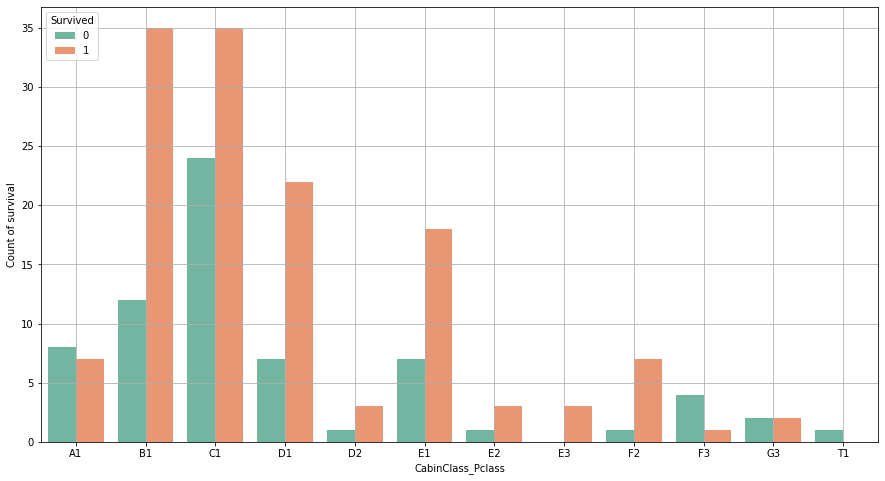

In [70]:
# Lets visualize it
plt.figure(figsize=(15,8))
sns.barplot(data=cabineffect,x='CabinClass_Pclass',y='PassengerId',hue='Survived',palette='Set2')
plt.xlabel('CabinClass_Pclass')
plt.ylabel('Count of survival')
plt.grid()
plt.show()

In [71]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
# How is it related to Survived?
Embarked= titanic[['Embarked','Survived','PassengerId']].groupby(['Embarked','Survived']).count()
Embarked = Embarked.reset_index()
Embarked

,Embarked,Survived,PassengerId
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


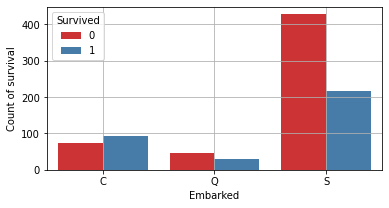

In [73]:
# Lets visualize it
plt.figure(figsize=(6,3))
sns.barplot(data=Embarked,x='Embarked',y='PassengerId',hue='Survived',palette='Set1')
plt.xlabel('Embarked')
plt.ylabel('Count of survival')
plt.grid()
plt.show()

In [74]:
# Creating a final df column to use it with Model
finaldf = titanic[['Survived', 'Pclass','Age', 'SibSp','Parch','Fare', 'Embarked', 'gender','CabinClass_Pclass']].copy()
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass
0,0,3,22.0,1,0,7.2500,S,1,NaN
1,1,1,38.0,1,0,71.2833,C,0,C1
2,1,3,26.0,0,0,7.9250,S,0,NaN
3,1,1,35.0,1,0,53.1000,S,0,C1
4,0,3,35.0,0,0,8.0500,S,1,NaN


In [75]:
# Converting everything into numeric
embarked = pd.get_dummies(finaldf['Embarked'],prefix='Embarked_')
print(embarked.shape)
embarked.head()

(891, 3)


,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [76]:
finaldf = pd.concat([finaldf,embarked],axis=1)
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass,Embarked__C,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,S,1,NaN,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,C1,1,0,0
2,1,3,26.0,0,0,7.9250,S,0,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,C1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,NaN,0,0,1


In [77]:
# Doing the same for CabinClass_Pclass
cabinclass = pd.get_dummies(finaldf['CabinClass_Pclass'],prefix='CabinClass_')
print(cabinclass.shape)
cabinclass.head()

(891, 12)


,CabinClass__A1,CabinClass__B1,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
finaldf = pd.concat([finaldf,cabinclass],axis=1)
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass,Embarked__C,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,S,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,C,0,C1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,S,0,C1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
finaldf_numeric = finaldf.drop(['Embarked','CabinClass_Pclass'],axis=1)
finaldf_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Embarked__C,Embarked__Q,Embarked__S,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


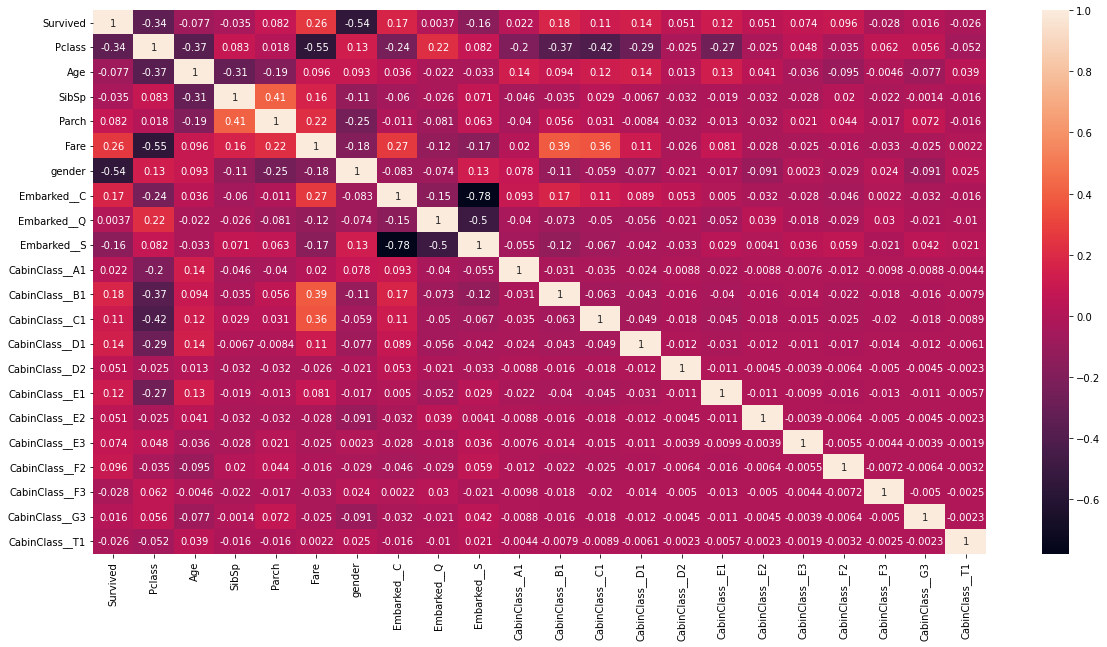

In [80]:
# Lets check the correlations between all these numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(finaldf_numeric.corr(),annot=True)

In [81]:
# Lets drop Embarked_C as it it giving us same information as dummies
finaldf_numeric = finaldf_numeric.drop('Embarked__C',axis=1)
finaldf_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Embarked__Q,Embarked__S,CabinClass__A1,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# Base Estimator 
rfc_base = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [4]:
y = train_data.Survived 
X = train_data.drop(['Survived'], axis = 1)

In [83]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

object_columns = list(train_data.select_dtypes(include = object))
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_columns if X[col].nunique() < 10]
# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_columns)-set(low_cardinality_cols))

In [6]:
def strat_kfold_gen_skl(x, y, k):
    kf = KFold(n_splits=k, random_state= None, shuffle = True)
    solution = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        solution.append(tuple([x_train, y_train, x_test, y_test]))
    return solution


def fit_predict(X_train, y_train, X_test, y_test, classifier):
    classifier.fit(X_train, y_train)
    return classifier.predict(X_test)

params = {  'splitter' : ['best', 'random'],
            'max_depth': range (2,13),
            'max_features' : ['auto', 'sqrt', 'log2', None],
            'max_leaf_nodes': range(2, 20)}
def get_best_estimator(estimator, dict_of_params, X, y, cv_num):
    gscv = GridSearchCV(estimator, dict_of_params, n_jobs = 4, scoring = balanced_accuracy_score, cv = cv_num, refit = True).fit(X, y)
    beste = gscv.best_estimator_
    return beste

In [84]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
oh_calls_X = pd.DataFrame(encoder.fit_transform(X[low_cardinality_cols]))
oh_calls_X.index = X.index
oh_nums_X = X.drop(object_columns, axis = 1)
oh_X = pd.concat([oh_nums_X, oh_calls_X], axis = 1)
oh_X = oh_X.fillna(oh_X.median())
oh_X = oh_X.drop("PassengerId", axis =1)
oh_X["FamilySize"] = oh_X["SibSp"] + oh_X["Parch"]
oh_X = oh_X.drop("SibSp", axis =1)
oh_X = oh_X.drop("Parch", axis =1)


scaler = MinMaxScaler(feature_range=(0,1))
scaler_transform = scaler.fit_transform(oh_X[['Age','Fare']])
scaler_transformdf = pd.DataFrame(scaler_transform,columns=['Age_norm','Fare_norm'])
scaler_transformdf.head()


oh_X = pd.concat([oh_X,scaler_transformdf],axis=1)
oh_X = oh_X.drop(['Age','Fare'],axis=1)

In [85]:
X_np = oh_X.to_numpy(copy = True)
y_np = y.to_numpy(copy = True)

In [9]:
def k_fold_evaluation(classifier):
  k  = np.arange(2,30)
  accuracy_test = np.zeros(28)
  accuracy_train = np.zeros(28)
  for ks in k:
      cur_accuracy = np.zeros(ks)
      cur_accuracy_train = np.zeros(ks)
      for i in range(0, ks):
          X_train, y_train, X_test, y_test = strat_kfold_gen_skl(X_np, y_np, ks+1)[i]
          predictions = fit_predict(X_train, y_train, X_test, y_test, classifier)
          cur_accuracy[i] = (roc_auc_score(y_test, predictions))
          predictions_train = fit_predict(X_train, y_train, X_train, y_train, classifier)
          cur_accuracy_train[i] = (roc_auc_score(y_train, predictions_train))
      accuracy_test[ks-2] = np.mean(cur_accuracy)
      accuracy_train[ks-2] = np.mean(cur_accuracy_train)
  return accuracy_test, accuracy_train

In [87]:
def kfold_plot(classifier):
  plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
  k  = np.arange(2,30)

  accuracy_test, accuracy_train = k_fold_evaluation(classifier)

  plt.subplot(2,1,1)
  plt.plot(k, accuracy_test)
  plt.ylabel("Accuracy for test data")
  plt.xlabel("K")
  plt.subplot(2,1,2)
  plt.plot(k, accuracy_train)
  plt.ylabel("Accuracy for training data")
  plt.xlabel("K")
  plt.show()
  print(accuracy_test.mean())

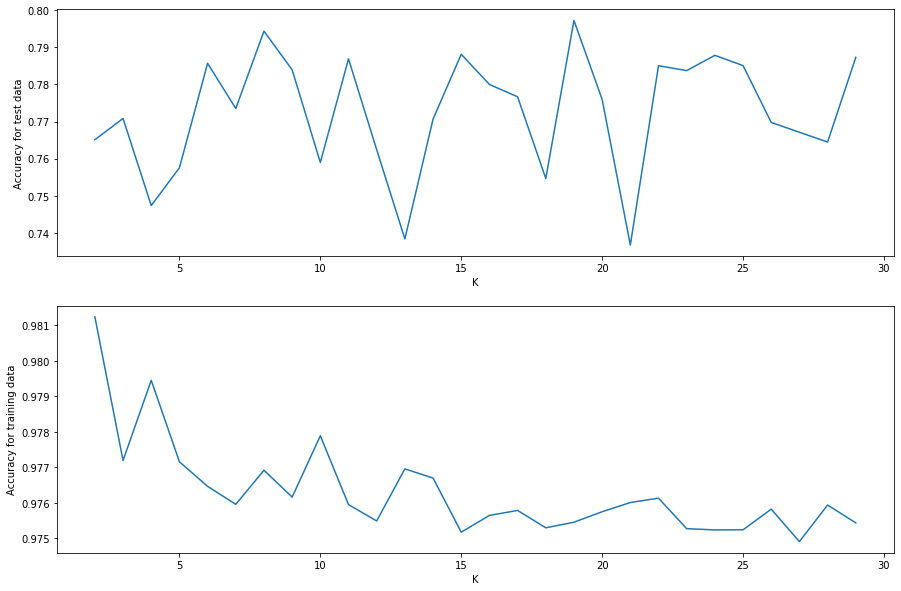

0.772682015472179


In [88]:
tree_classifier = DecisionTreeClassifier()
kfold_plot(tree_classifier)

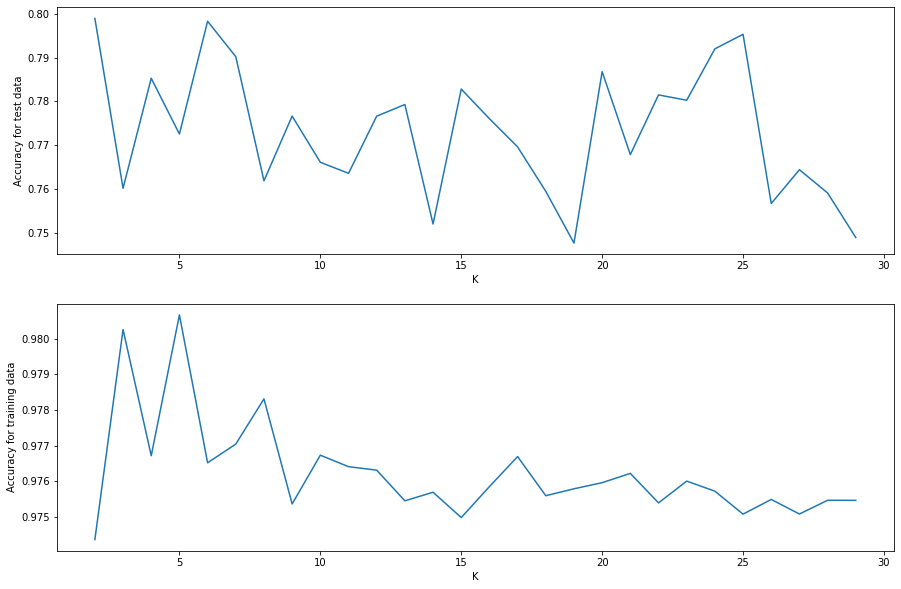

0.7732409076916958


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
kfold_plot(tree_classifier)

In [ ]:
plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
k  = np.arange(2,21)
accuracy_test = np.zeros(19)
accuracy_train = np.zeros(19)
for ks in k:
    cur_accuracy = np.zeros(ks)
    cur_accuracy_train = np.zeros(ks)
    classifier = get_best_estimator(DecisionTreeClassifier(), params, X_train, y_train, cv_num = ks)
    print(f"Best classifier: {classifier} for ks = {k}")
    for i in range(0, ks):
        X_train, y_train, X_test, y_test = strat_kfold_gen_skl(X_np, y_np, ks+1)[i]
        predictions = fit_predict(X_train, y_train, X_test, y_test, classifier = classifier)
        cur_accuracy[i] = (roc_auc_score(y_test, predictions))
        predictions_train = fit_predict(X_train, y_train, X_train, y_train, classifier)
        cur_accuracy_train[i] = (roc_auc_score(y_train, predictions_train))
    accuracy_test[ks-1] = np.mean(cur_accuracy)
    accuracy_train[ks-1] = np.mean(cur_accuracy_train)

plt.subplot(2,1,1)
plt.plot(k, accuracy_test)
plt.ylabel("Accuracy for test data")
plt.xlabel("K")
plt.subplot(2,1,2)
plt.plot(k, accuracy_train)
plt.ylabel("Accuracy for training data")
plt.xlabel("K")
plt.show()

In [ ]:
calls_test = pd.DataFrame(encoder.fit_transform(test_data[low_cardinality_cols]))
test.index = test_data.index
nums_test = test_data.drop(object_columns, axis = 1)
test = pd.concat([nums_test, calls_test], axis = 1)
test = test.fillna(oh_X.median())
test = test.drop("PassengerId", axis =1)
test["FamilySize"] = test["SibSp"] + test["Parch"]
test = test.drop("SibSp", axis =1)
test = test.drop("Parch", axis =1)
test["5"] = 0

classifier = DecisionTreeClassifier(max_depth = 17, random_state = 11, max_leaf_nodes = 60, splitter = 'best')
classifier.fit(X_np, y_np)
answer = classifier.predict(test)

submission_file = pd.concat([test_data["PassengerId"], pd.DataFrame(answer, columns = ["Survived"])], axis = 1)
submission_file.to_csv('.//titanic_submission_1.csv', index = False)

In [92]:
import seaborn as sns

def k_neighbors_plot(n_neighbors):
  acc = np.zeros(n_neighbors.max())
  for k_neighbors in n_neighbors:
    knn_cl = KNeighborsClassifier(weights = "distance", n_neighbors = k_neighbors)
    accuracy, _ = k_fold_evaluation(knn_cl)
    acc[k_neighbors-1] = accuracy.mean()
  
  plt.stem(n_neighbors, acc)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


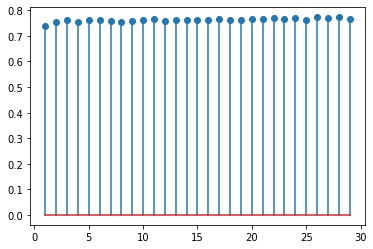

In [93]:
n_neighbors = np.arange(1, 30)
k_neighbors_plot(n_neighbors)

In [94]:
def dtc_plot():
  n_leaf = np.arange(2, 40)
  depth = np.arange(1, 35)
  accuracy_l = np.zeros(n_leaf.max()-1)
  accuracy_d = np.zeros(depth.max())
  for i in n_leaf:
    dtc = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = i)
    accuracy, _ = k_fold_evaluation(dtc)
    accuracy_l[i-2] = accuracy.mean()
  for j in depth:
    dtc = DecisionTreeClassifier(max_depth = j)
    accuracy, _ = k_fold_evaluation(dtc)
    accuracy_d[j-1] = accuracy.mean()
  plt.plot(n_leaf, accuracy_l, color='r', label='Leaf')
  plt.plot(depth, accuracy_d, color='g', label='Depth')
    
  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()
    
  # To load the display window
  plt.show()

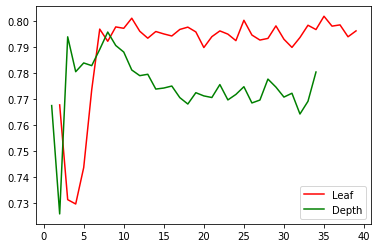

In [95]:
dtc_plot()

In [13]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_plot():
  n_trees = np.arange(1, 8) #1, 102, 4
  depth = np.arange(1, 5)
  accuracy_t = np.zeros(n_trees.max())
  accuracy_d = np.zeros(depth.max())
  for i in n_trees:
    dtc = RandomForestClassifier(max_depth = 3, n_estimators = i)
    accuracy, _ = k_fold_evaluation(dtc)
    accuracy_t[i-1] = accuracy.mean()
  for j in depth:
    dtc = RandomForestClassifier(max_depth = j)
    accuracy, _ = k_fold_evaluation(dtc)
    accuracy_d[j-1] = accuracy.mean()
  plt.plot(n_trees, accuracy_t, color='r', label='Trees')
  plt.plot(depth, accuracy_d, color='g', label='Depth')
    
  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()
    
  # To load the display window
  plt.show()

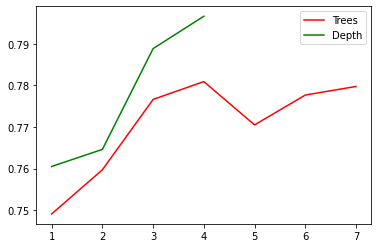

In [132]:
random_forest_plot()

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Base Estimator 
rfc_base = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None, 
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0)



# Train Test split
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_np,y_np,train_size=0.60,random_state=42)
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape


# Adaboost model - Training to check if it improves the scores of our model
adaboost_model_1 = AdaBoostClassifier(base_estimator=rfc_base,algorithm="SAMME")
adaboost_model_1.fit(X_train_1,y_train_1)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(max_depth=5,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         n_estimators=10,
                                                         random_state=42))

In [101]:
# Param grid :
param_grid = {'base_estimator__max_depth':[2,5],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7,0.8,0.9,1.]}

# folds
n_folds =3

# Adaboost Initialization with base model
abc_rfc = AdaBoostClassifier(base_estimator=rfc_base,
                            algorithm='SAMME')

# Setup Grid Search
grid_search_abc = GridSearchCV(abc_rfc,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='roc_auc')

In [103]:
# Run Grid search
grid_search_abc.fit(X_train_1,y_train_1)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(max_depth=5,
                                                                                min_samples_leaf=10,
                                                                                min_samples_split=40,
                                                                                n_estimators=10,
                                                                                random_state=42)),
             param_grid={'base_estimator__max_depth': [2, 5],
                         'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             return_train_score=True, scoring='roc_auc')

In [104]:
# Results of Grid search
pd.DataFrame(grid_search_abc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.571733,0.832946,0.137055,0.077590,2,0.5,100,"{'base_estimator__max_depth': 2, 'learning_rat...",0.883824,0.791717,0.867420,0.847654,0.040116,27,0.940752,0.945408,0.960602,0.948921,0.008476
1,3.646990,0.608686,0.311956,0.107454,2,0.5,200,"{'base_estimator__max_depth': 2, 'learning_rat...",0.879118,0.807987,0.869302,0.852136,0.031474,17,0.981948,0.985764,0.973847,0.980520,0.004969
2,2.537502,0.476594,0.292592,0.056256,2,0.5,300,"{'base_estimator__max_depth': 2, 'learning_rat...",0.882614,0.795079,0.871588,0.849760,0.038927,22,0.979831,0.993428,0.976082,0.983114,0.007452
3,0.560697,0.474391,0.056878,0.050203,2,0.5,400,"{'base_estimator__max_depth': 2, 'learning_rat...",0.884228,0.795079,0.890077,0.856461,0.043469,8,0.906582,0.925020,0.956384,0.929329,0.020558
4,1.236051,0.542215,0.128755,0.042012,2,0.5,500,"{'base_estimator__max_depth': 2, 'learning_rat...",0.880463,0.805970,0.892228,0.859554,0.038192,3,0.963477,0.981360,0.934315,0.959717,0.019389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.961034,0.403406,0.197079,0.020343,5,1.0,200,"{'base_estimator__max_depth': 5, 'learning_rat...",0.883824,0.793600,0.840527,0.839317,0.036844,55,0.999664,0.999781,0.999076,0.999507,0.000309
68,2.434156,0.547390,0.234417,0.054251,5,1.0,300,"{'base_estimator__max_depth': 5, 'learning_rat...",0.870109,0.782103,0.844695,0.832302,0.036982,65,0.999697,0.999882,0.999076,0.999552,0.000345
69,2.069715,0.212856,0.215620,0.021828,5,1.0,400,"{'base_estimator__max_depth': 5, 'learning_rat...",0.864730,0.794675,0.843485,0.834297,0.029329,62,0.999697,0.999849,0.998907,0.999485,0.000413
70,1.817632,0.268075,0.171662,0.021557,5,1.0,500,"{'base_estimator__max_depth': 5, 'learning_rat...",0.852898,0.789969,0.834812,0.825893,0.026453,72,0.999630,0.999815,0.999076,0.999507,0.000314


In [105]:
# Best AUC score and estimators
print('Best AUC: ',grid_search_abc.best_score_)
print('Best Estimators: ',grid_search_abc.best_estimator_)

Best AUC:  0.8613016001075703
Best Estimators:  AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(max_depth=2,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         n_estimators=10,
                                                         random_state=42),
                   learning_rate=0.6, n_estimators=500)


In [107]:
# Best training Score for AdaBoost
adaboost_final = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=42,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.5, n_estimators=400, random_state=42)

adaboost_final_fit = adaboost_final.fit(X_train_1,y_train_1)

In [109]:
# First defining Confusion Matrix
from sklearn.metrics import confusion_matrix
def confusion(model_fit, X,y_true):
    # Predict using the model
    y_pred = model_fit.predict(X)
    #Confusion Matrix
    confusion = confusion_matrix(y_true,y_pred)
    print("\n The Confusion Matrix :\n",confusion)
    # Calculate scores
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    print("Accuracy : ",round(100*(TN+TP)/(TN+TP+FN+FP),2))
    print("Sensitivity : ",round(100*(TP)/(TP+FN),2))
    print("Specificity :",round(100*(TN)/(TN+FP),2))
    print("Precision : ",round(100*(TP)/(TP+FP),2))

In [110]:
# Training metrics
print('TRAINING_ METRICS_')
confusion(model_fit=adaboost_final_fit,X=X_train_1,y_true=y_train_1)

TRAINING_ METRICS_

 The Confusion Matrix :
 [[318  15]
 [ 42 159]]
Accuracy :  89.33
Sensitivity :  79.1
Specificity : 95.5
Precision :  91.38


In [112]:
# TEST metrics
print('TEST_ METRICS_')
confusion(model_fit=adaboost_final_fit,X=X_test_1,y_true=y_test_1)

TEST_ METRICS_

 The Confusion Matrix :
 [[191  25]
 [ 40 101]]
Accuracy :  81.79
Sensitivity :  71.63
Specificity : 88.43
Precision :  80.16


In [114]:
from xgboost import XGBClassifier



# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3,0.4,0.5, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      



# Fitting Gridsearch
model_cv_fit = model_cv.fit(X_train_1,y_train_1)



In [115]:
# Best score
model_cv.best_score_

0.8735642188172221

In [116]:
# Best Hyperparams
model_cv.best_estimator_

XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.6)

In [122]:
# XGB Model
xgbmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1,
              n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              use_label_encoder=True, validate_parameters=1)

xgbmodel_fit = xgbmodel.fit(X_train_1,y_train_1)

In [124]:
# How does it score against test data
print('TEST DATA')
confusion(model_fit=xgbmodel_fit,X=X_test_1,y_true=y_test_1)

TEST DATA

 The Confusion Matrix :
 [[189  27]
 [ 39 102]]
Accuracy :  81.51
Sensitivity :  72.34
Specificity : 87.5
Precision :  79.07


In [125]:
# Setting up parameter grid
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"],
    'class_weight':[{0:1,1:1},{0:1.5,1:1},{0:1.6,1:1},None]
}

# n_folds
n_folds =5 

# Instantiate GridSearch Model ( Random Forest )
dtree_grid = DecisionTreeClassifier(random_state=42)

# Grid Search Model
dtree_grid_search = GridSearchCV(estimator=dtree_grid,
                              param_grid = param_grid,
                              cv=n_folds,
                              scoring='accuracy',
                              verbose=1)

# Fitting Grid search to data
dtree_grid_search_fit = dtree_grid_search.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


In [126]:
# Getting best score and estimators
print('Best score: ',dtree_grid_search.best_score_)
print('Best Estimator',dtree_grid_search.best_estimator_)

Best score:  0.839005466408041
Best Estimator DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)


In [129]:
# Boosting prediction
best_dtree = DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

# Param grid :
param_grid = {'base_estimator__max_depth':[2,5],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7]}

# folds
n_folds =5

# Adaboost Initialization with base model
abc_best = AdaBoostClassifier(base_estimator=best_dtree,
                            algorithm='SAMME')

# Setup Grid Search
abc_best_grid_search = GridSearchCV(abc_best,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='accuracy')
# Fitting Grid Search
abc_best_grid_search_fit = abc_best_grid_search.fit(X_train_1,y_train_1)

In [130]:
# Getting best score and estimators
print('Best score: ',abc_best_grid_search.best_score_)
print('Best Estimator',abc_best_grid_search.best_estimator_)

Best score:  0.8427966848880268
Best Estimator AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         random_state=42),
                   learning_rate=0.6, n_estimators=500)


In [133]:
# Best Adaboosted Tree Classifier 
abc_best_dtree = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.7, n_estimators=200, random_state=None)

abc_best_dtree_fit = abc_best_dtree.fit(X_train_1,y_train_1)

print('TRAINING DATA:')
confusion(model_fit=abc_best_dtree_fit,X=X_train_1,y_true=y_train_1)
print('\nTEST DATA:')
confusion(model_fit=abc_best_dtree_fit,X=X_test_1,y_true=y_test_1)

TRAINING DATA:

 The Confusion Matrix :
 [[313  20]
 [ 46 155]]
Accuracy :  87.64
Sensitivity :  77.11
Specificity : 93.99
Precision :  88.57

TEST DATA:

 The Confusion Matrix :
 [[192  24]
 [ 39 102]]
Accuracy :  82.35
Sensitivity :  72.34
Specificity : 88.89
Precision :  80.95


In [138]:
calls_test = pd.DataFrame(encoder.fit_transform(test_data[low_cardinality_cols]))
calls_test.index = test_data.index
nums_test = test_data.drop(object_columns, axis = 1)
test = pd.concat([nums_test, calls_test], axis = 1)
test = test.fillna(test.median())
test = test.drop("PassengerId", axis =1)
test["FamilySize"] = test["SibSp"] + test["Parch"]
test = test.drop("SibSp", axis =1)
test = test.drop("Parch", axis =1)
scaler_transform = scaler.fit_transform(test[['Age','Fare']])
scaler_transformdf = pd.DataFrame(scaler_transform,columns=['Age_norm','Fare_norm'])
scaler_transformdf.head()
test = pd.concat([test,scaler_transformdf],axis=1)
test = test.drop(['Age','Fare'],axis=1)
test["5"] = 0
print(test.info())
classifier = DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         random_state=42)
classifier.fit(X_np, y_np)
answer = classifier.predict(test)

submission_file = pd.concat([test_data["PassengerId"], pd.DataFrame(answer, columns = ["Survived"])], axis = 1)
submission_file.to_csv('.//titanic_submission_1.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   0           418 non-null    float64
 2   1           418 non-null    float64
 3   2           418 non-null    float64
 4   3           418 non-null    float64
 5   4           418 non-null    float64
 6   FamilySize  418 non-null    int64  
 7   Age_norm    418 non-null    float64
 8   Fare_norm   418 non-null    float64
 9   5           418 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 32.8 KB
None


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
